In [1]:
#https://lvis.gsfc.nasa.gov/workshop/LVIS_QGIS_Tutorial_Gabon.pdf

# Goal

The goal of this project is to reporduct the LVIS Lidar Data Collected in Gabon Opening and Viewing data. The Meothod show in the lab the goal is the changethe study site to to the 

# Data 

**Data dictionary**  
https://lvis.gsfc.nasa.gov/data_sets/2016_gabon/LVIS_GabonAfriSAR_data_release.pdf

##### Mondah_Field_Data_Trees 

**Download**  
https://daac.ornl.gov/AFRISAR/guides/AfriSAR_Mondah_Field_Data.html

**Notes**

_For each 0.0625 ha subplot the data covers: GPS location of the 4 corners, x,y location of trees within a subplot, measurements of live tree family, species, DBH, height of each tree, and biomass at individual tree and plot level.  Data file: Mondah_Field_Data_Trees.csv.   Family and species of each tree was determined by a local botanist. DBH is the Diameter at Breast Height measured with a diameter measurement tape at 1.3 m height. Tree height measured in the field with DBH meter and a clinometer. Biomass of each tree is estimated using the Chave et al. 2014 equation with tree diameter, wood specific gravity (defined by tree species) and tree height. From the biomass of each individual tree, the biomass at plot level was calculated by adding the biomass of every tree within the 1 ha plot boundaries._


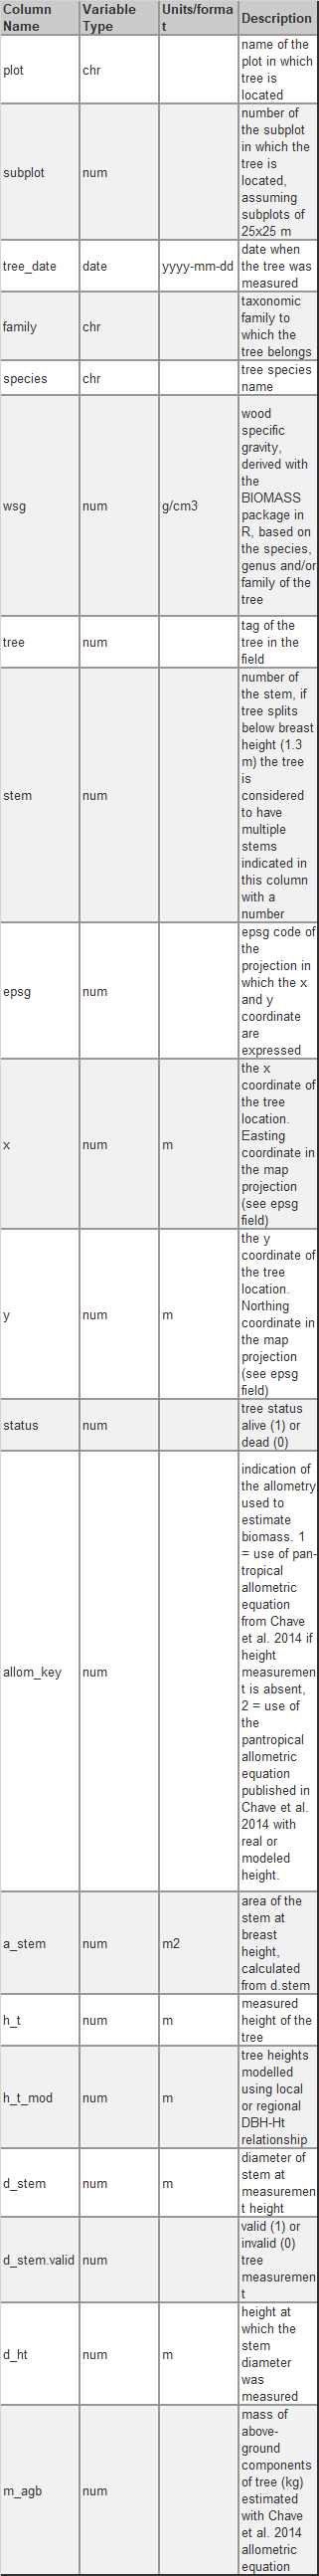

##### Mondah_Field_Data_Plots 

**Download**    
https://daac.ornl.gov/AFRISAR/guides/AfriSAR_Mondah_Field_Data.html

_At each plot level we calculated basal area, aboveground biomass, number of trees per plot, maximum tree height, and basal-area-weighted wood specific gravity.  Respective aggregated data files:  Mondah_Field_Data_Plot-0.0625ha.csv, Mondah_Field_Data_Plot-0.25ha.csv, and Mondah_Field_Data_Plot-1ha.csv. Biomass density information for different plot sizes was calculated by adding the biomass data for each individual tree within the boundaries of a certain subplot and divide by the area of that subplot to calculate biomass density for each subplot._


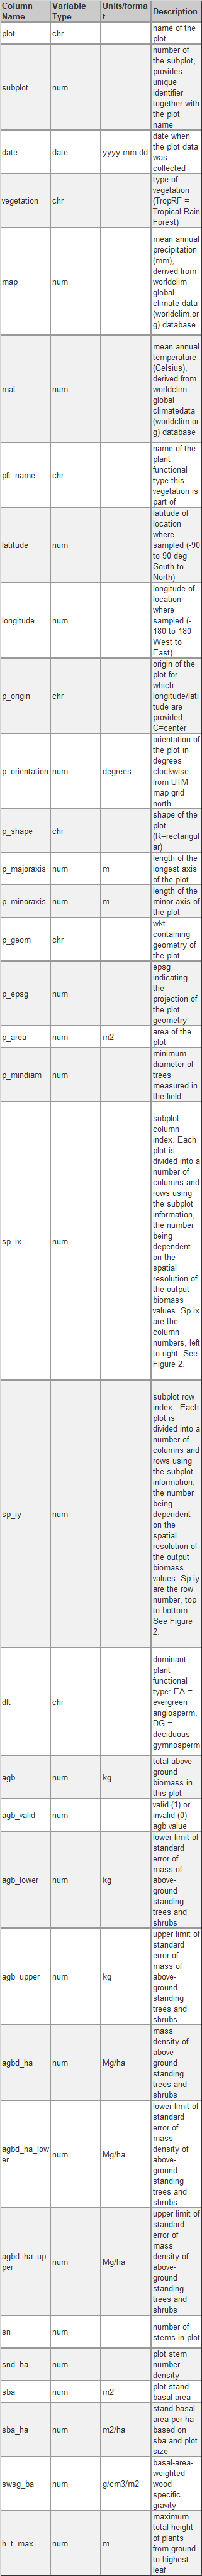

##### Flight Data 

**Download**  
https://lvis.gsfc.nasa.gov/Data/Maps/Gabon2016Map.html

##### LVIS L2 Elevation and Height Products

**Download** 
https://nsidc.org/data/aflvis2

**Notes**  
_The data in this Level-2 product were collected as part of the AfriSAR mission by the NASA Land, Vegetation, and Ice Sensor (LVIS) in collaboration with the European Space Agency (ESA) and the Gabonese Space Agency. The AfriSAR mission was an airborne campaign that collected radar and field measurements of tropical forests in Gabon, West Africa. The AfriSAR data is a precursor to upcoming spaceborne missions that examine the role of forests in Earth's carbon cycle. The data are also distributed in the Level-1B format, through the AfriSAR LVIS L1B Geolocated Return Energy Waveforms data set. The Level-1B data files contain geolocated laser waveform data for each laser footprint. Other related LVIS data sets include Level-0, Level-1B, and Level-2 products collected as part of the Operation IceBridge campaigns. See the Related Data Collections section for links to these data sets._


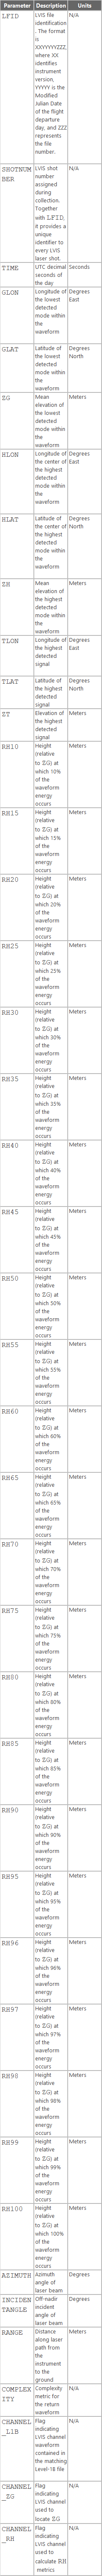

###### LVIS L1B Geolocated Waveforms


**Download**  
https://lvis.gsfc.nasa.gov/Data/Maps/Gabon2016Map.html

### Starting the Lab 

The first change was there data to out study site that are the polots in Mondah. Starting with the study sit look at the data of the flow over and identitied what day the fly over was. 

#### Flight Paths 

In order to find the L1B and the L2 data corapsoneds with the study sites use of the flight path data is needed. Over laying the flight paths with the study sites provide a date to such for. With most of the data over study sites come March 03 2016 will be the data pulled from the web. 


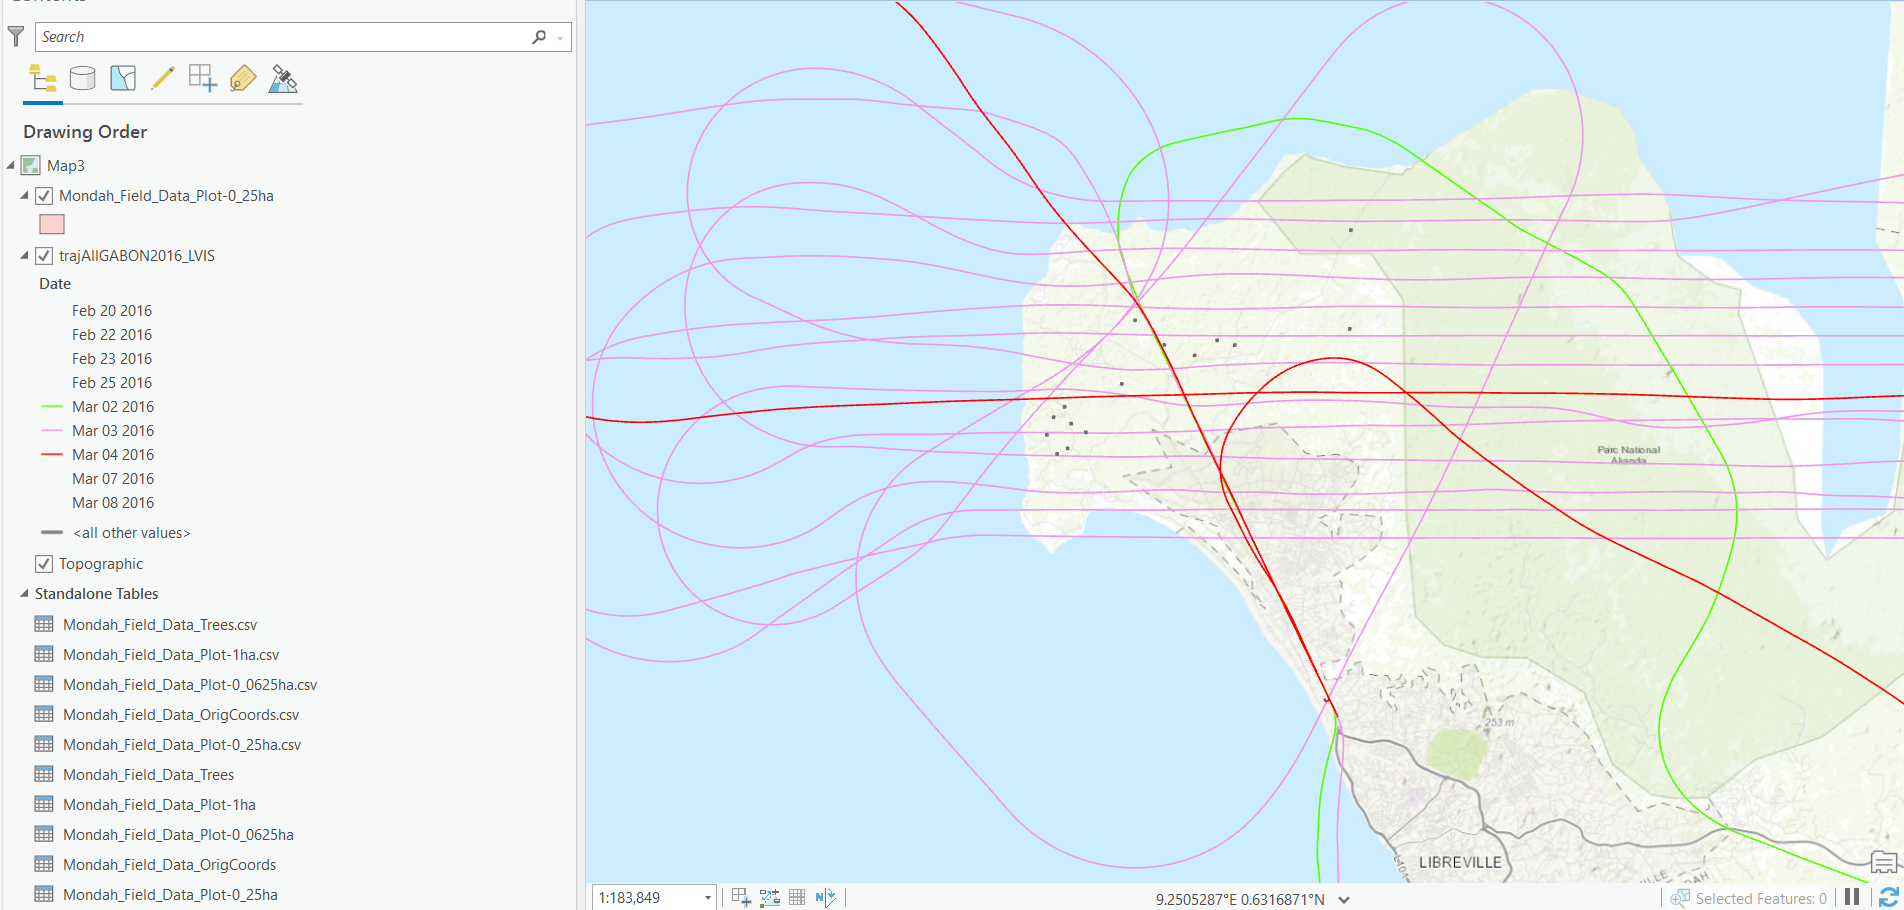

#####  LVIS L2 Elevation and Height Products

With the data of the filght L2 data can be looked up using its naming convention. 



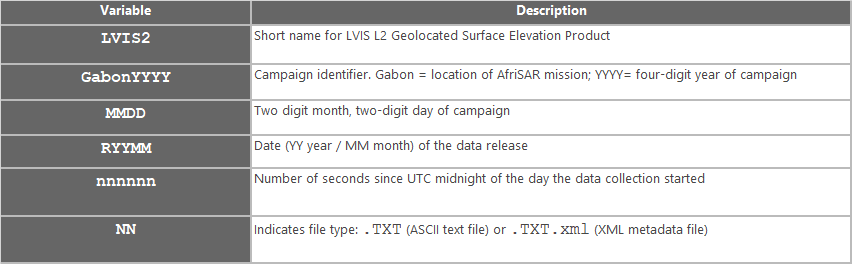

Using the MMDD the of 0303 the flight data can be queried. 

After it download it can be process into cvs and shapefile like show in the lab.

#### Finding ShotNumbers with in the study area

The shapefile that is products has a footprint for each shot number. Each of those foot print have the data listed for L2. Using the overlay function select the footprint that fall with in each of the study areas. 

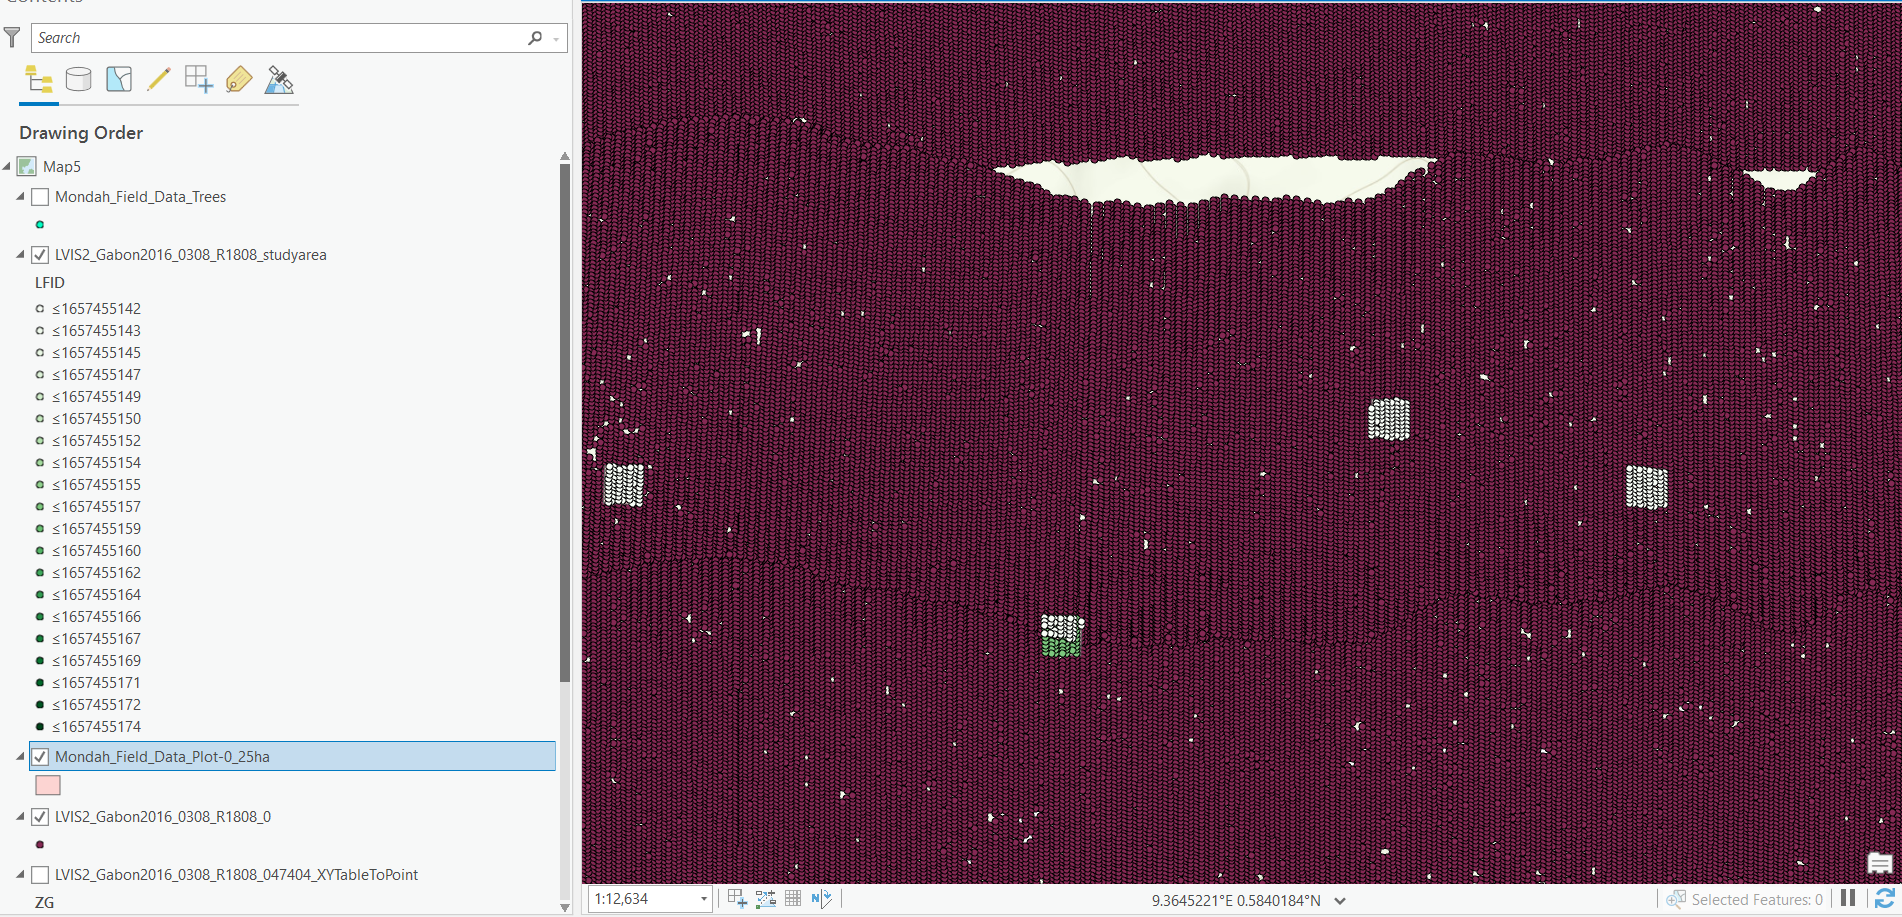

When over layed with the tree data. When the LVIS L2 data in Red is over layed with the field data in green its looks like this. 

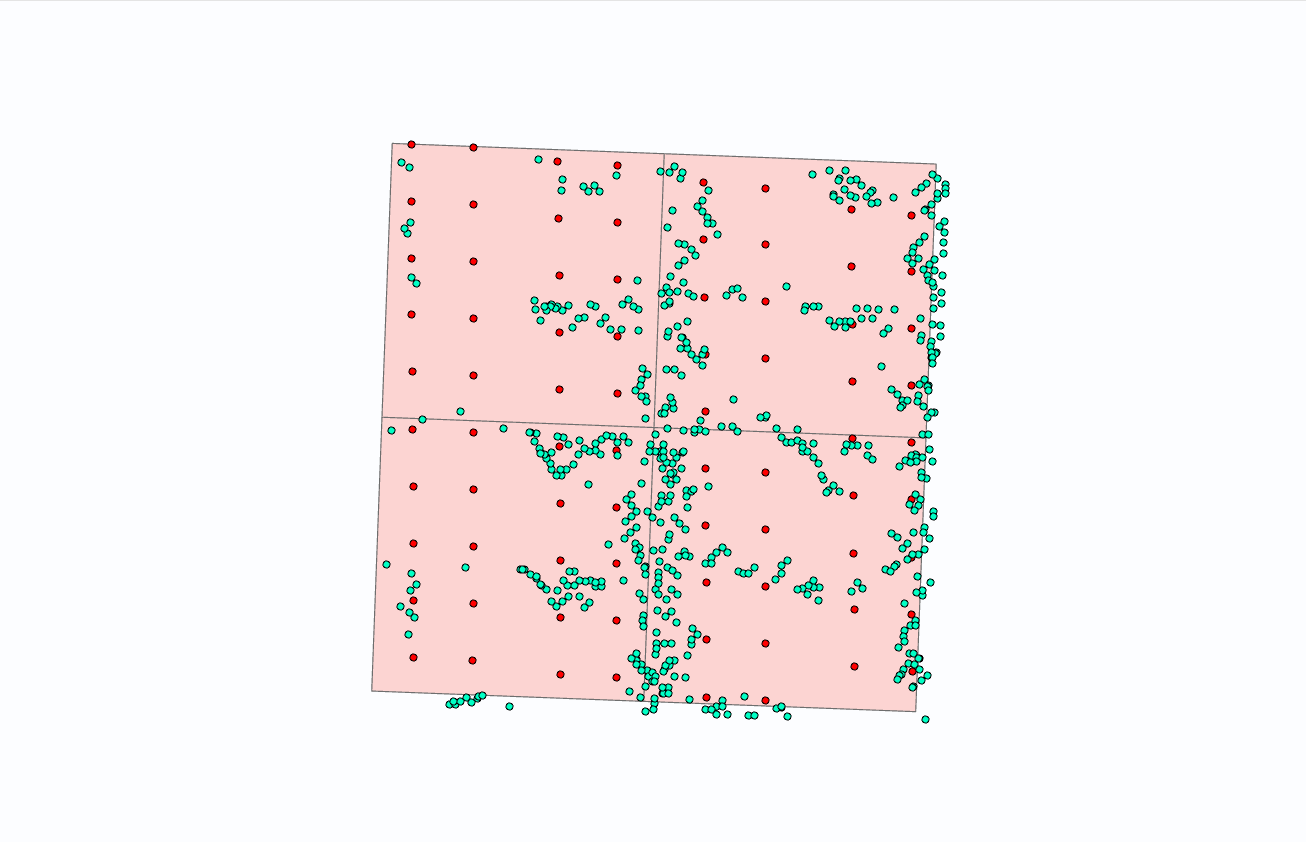

### py_L2Plot Code 

#Example script: PLOT LVIS Level2 parameters vs Longitude for a selected sample in QGIS 
#http://lvis.gsfc.nasa.gov

#canvas = qgis.utils.iface.mapCanvas()
#registry = QgsMapLayerRegistry.instance()
#layers = registry.mapLayers()
#vectorLyr =  QgsVectorLayer('c:/temp/my_subset.shp','Layer 1', 'ogr)
#vectorLyr.isValid()
#layer = iface.addVectorLayer("c:/temp/my_subset.shp", "layer 1", "ogr")


import matplotlib.pyplot
import pylab
 
layer = qgis.utils.iface.activeLayer()
selection = layer.selectedFeatures()
print len(selection)
#initialize arrays
LON0 = []
ZG = []
RH25 = []
RH50 = []
RH75 = []
ZT = []
for feature in selection:
 attrs = feature.attributes()
 LON0.append(attrs[3])
 ZG.append(attrs[5])
 RH25.append(attrs[12]+attrs[5])
 RH50.append(attrs[17]+attrs[5])
 RH75.append(attrs[22]+attrs[5])
 ZT.append(attrs[8])

matplotlib.pyplot.scatter(LON0,ZG,color='r') 
matplotlib.pyplot.scatter(LON0,RH25,color='orange') 
matplotlib.pyplot.scatter(LON0,RH50,color='y')
matplotlib.pyplot.scatter(LON0,RH75,color='g')
matplotlib.pyplot.scatter(LON0,ZT,color='b')
matplotlib.pyplot.show()

In [ ]:
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html#:~:text=%20Filter%20pandas%20dataframe%20by%20column%20value%20,same%20output.%20It%27s%20just%20a%20different...%20More%20

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd

In [58]:
Trees = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\Mondah_Field_Data_Trees.csv')
Trees

,OID_,plot,subplot,tree_date,family,species,wsg,tree,stem,epsg,...,y,status,allom_key,a_stem,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb
0,NaN,NASA01,1,2/3/2016 0:00:00,Euphorbiaceae,Macaranga sp.,0.381789,6501,1,32632,...,61322.4808,1,2,0.011120,-9999.0,12.18,0.119,1,1.65,37.92
1,NaN,NASA01,1,2/3/2016 0:00:00,Euphorbiaceae,Macaranga sp.,0.381789,6502,1,32632,...,61327.0536,1,2,0.008171,-9999.0,11.28,0.102,1,1.30,26.05
2,NaN,NASA01,1,2/3/2016 0:00:00,Euphorbiaceae,Macaranga sp.,0.381789,6503,1,32632,...,61327.9769,1,2,0.009331,-9999.0,11.66,0.109,1,1.30,30.62
3,NaN,NASA01,1,2/3/2016 0:00:00,Euphorbiaceae,Macaranga sp.,0.381789,6504,1,32632,...,61328.9761,1,2,0.011880,-9999.0,12.38,0.123,1,1.30,41.10
4,NaN,NASA01,1,2/3/2016 0:00:00,Euphorbiaceae,Macaranga sp.,0.381789,6505,1,32632,...,61326.0163,1,2,0.009331,-9999.0,11.66,0.109,1,1.30,30.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,NaN,NASA23,14,2/21/2016 0:00:00,Myristicaceae,Pycnanthus angolensis,0.408900,3905,1,32632,...,60302.9014,1,2,0.022170,-9999.0,14.45,0.168,1,1.30,93.90
6688,NaN,NASA23,14,2/21/2016 0:00:00,Melastomataceae,Dichaetanthera sp.,0.609414,3906,1,32632,...,60304.1720,1,2,0.010030,-9999.0,11.87,0.113,1,1.60,52.77
6689,NaN,NASA23,14,2/21/2016 0:00:00,NaN,NaN,0.534143,3907,1,32632,...,60304.6478,1,2,0.086570,-9999.0,20.24,0.332,1,1.30,640.25
6690,NaN,NASA23,15,2/1/2016 0:00:00,NaN,NaN,0.534143,102619,1,32632,...,-9999.0000,1,-9999,-9999.000000,-9999.0,-9999.00,-9999.000,-9999,-9999.00,-9999.00


In [43]:
LVIS = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\LVIS2_Gabon2016_0308_R1808_studyareaa.csv')
LVIS

,OBJECTID,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,...,RH98,RH99,RH100,AZIMUTH,INCIDENTANGLE,RANGE,COMPLEXITY,CHANNEL_L1B,CHANNEL_ZG,CHANNEL_RH
0,1,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,...,8.54,9.06,9.96,188.40,2.235,7705.33,-999,1,1,1
1,2,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,...,3.37,3.74,4.34,187.58,2.465,7705.35,-999,1,1,1
2,3,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,...,5.69,6.14,6.74,187.34,2.542,7705.95,-999,1,1,1
3,4,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,...,2.99,3.36,3.96,186.70,2.772,7707.17,-999,1,1,1
4,5,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,...,2.77,3.14,3.66,186.50,2.849,7707.77,-999,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,...,3.26,3.86,5.43,175.01,2.612,7703.56,-999,2,2,1
824,825,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,...,5.39,7.19,9.28,175.16,2.690,7704.76,-999,1,1,1
825,826,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,...,4.57,5.76,8.23,175.42,2.844,7706.57,-999,1,1,1
826,827,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,...,6.06,6.66,7.93,175.54,2.921,7706.58,-999,1,1,1


In [50]:
#Select by Shot numer 
LVISshot = df[(LVIS.SHOTNUMBER == 9911421)]

LVISshot

,OBJECTID,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,...,RH98,RH99,RH100,AZIMUTH,INCIDENTANGLE,RANGE,COMPLEXITY,CHANNEL_L1B,CHANNEL_ZG,CHANNEL_RH
823,824,1657455148,9911421,46228.812,9.330292,0.546591,25.3,-999,-999,-999,...,3.26,3.86,5.43,175.01,2.612,7703.56,-999,2,2,1


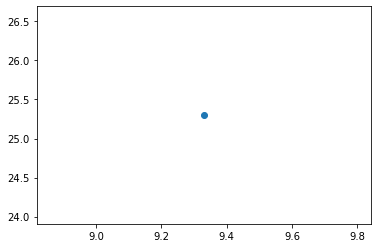

In [51]:


x = LVISshot.GLON
y = LVISshot.ZG

plt.scatter(x,y)

In [52]:
# Select Tree -- put in the number of the tree of intrest 

In [63]:
StudyTree = df[(Trees.tree == 6504)]

StudyTree

C:\Users\17183\AppData\Local\ESRI\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,OBJECTID,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,...,RH98,RH99,RH100,AZIMUTH,INCIDENTANGLE,RANGE,COMPLEXITY,CHANNEL_L1B,CHANNEL_ZG,CHANNEL_RH
3,4,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,...,2.99,3.36,3.96,186.7,2.772,7707.17,-999,1,1,1


In [68]:
#Finding LVIS near ST 
ST_LVIS = df[(LVIS.GLON > StudyTree.GLON + 1) ,
              (LVIS.GLON < StudyTree.GLON + 1) ,
               (LVIS.GLAT > StudyTree.GLAt + 1) ,
                (LVIS.GLON < StudyTree.GLON + 1)]

ValueError: Can only compare identically-labeled Series objects

### References

In [ ]:
#### AFRISAR DATA Field DATA

Chave, J. , Réjouâ-Méchain, M. , Búrquez, A. , Chidumayo, E. , Colgan, M. S., Delitti, W. B., Duque, A. , Eid, T. , Fearnside, P. M., Goodman, R. C., Henry, M. , Martínez-Yrízar, A. , Mugasha, W. A., Mullerâ-Landau, H. C., Mencuccini, M. , Nelson, B. W., Ngomanda, A., Nogueira, E. M., Ortiz-Malavassi, E. , Pélissier, R. , Ploton, P. , Ryan, C. M., Saldarriaga, J. G. and Vieilledent, G. (2014), Improved allometric models to estimate the aboveground biomass of tropical trees. Glob Change Biol, 20: 3177-3190. https://doi.org/10.1111/gcb.12629

T.E. Fatoyinbo, N. Pinto, M. Hofton, M. Simard, B. Blair, S. Saatchi, Y. Lou, R. Dubayah, S. Hensley, J. Armston, L. Duncanson, M. Lavalle. The 2016 NASA AfriSAR campaign: airborne SAR and Lidar measurements of tropical forest structure and biomass in support of future satellite missions. IEEE International Geoscience and Remote Sensing Symposium (July 23-28, 2017) (Fort Worth, Texas, USA, TH3.L9.1).

Lavalle, M., M. Simard, B. Riel, B. Hawkins, and N. Pinto. 2017. Tomographic imaging with UAVSAR: Current status and new results from the 2016 AfriSAR campaign. 2017 IEEE International Geoscience and Remote Sensing Symposium (IGARSS): 2485-2488

NASA. 2016. The ARMSTRONG X-PRESS. AfriSAR: NASA Science Mission Measures Changes in the Gabon Environment. Volume 58, Number 5, May 2016.  https://www.nasa.gov/sites/default/files/atoms/files/xpress_afrisar.pdf